In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data/chunk_33_prod.csv",index_col=None)
print len(df)
df.head(2)

984551


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,NombreCliente,Town,State,short_name,brand,weight,pieces
0,4,1110,7,3301,15766,325,1,8.15,0,0.0,1,PUESTO DE PERIODICOS LAZARO,2008 AG. LAGO FILT,"MÉXICO, D.F.",Tuinky Vainilla,WON,114,3.0
1,4,1110,7,3301,198780,325,3,24.45,0,0.0,3,DULCERIA HOSPITAL ESPAÑOL,2008 AG. LAGO FILT,"MÉXICO, D.F.",Tuinky Vainilla,WON,114,3.0


In [4]:
identifier_list = ['Canal_ID','Agencia_ID','Ruta_SAK','Cliente_ID','Producto_ID']

In [7]:
predictor_list = {}
l = len(df)
for i in range(0,l):
    if (i % 40000) == 0:
        print (float(i)/float(l))*100.0
    d = df.iloc[i]
    hash_idx = str(d['Canal_ID']) + '_' + str(d['Agencia_ID'])+ '_' + str(d['Ruta_SAK'])+ '_' + str(d['Cliente_ID'])+ '_' + str(d['Producto_ID'])
    
    if not predictor_list.has_key(hash_idx):
        predictor_list[hash_idx] = [[],[]]

    predictor_list[hash_idx][0].append(d['Semana'])
    predictor_list[hash_idx][1].append(d['Demanda_uni_equil'])

0.0
1.0156914167
2.03138283339
3.04707425009
4.06276566679
5.07845708348
6.09414850018
7.10983991688
8.12553133357
9.14122275027
10.156914167
11.1726055837
12.1882970004
13.2039884171
14.2196798338
15.2353712504
16.2510626671
17.2667540838
18.2824455005
19.2981369172
20.3138283339
21.3295197506
22.3452111673
23.360902584
24.3765940007
25.3922854174
26.4079768341
27.4236682508
28.4393596675
29.4550510842
30.4707425009
31.4864339176
32.5021253343
33.517816751
34.5335081677
35.5491995844
36.5648910011
37.5805824178
38.5962738345
39.6119652512
40.6276566679
41.6433480846
42.6590395013
43.674730918
44.6904223346
45.7061137513
46.721805168
47.7374965847
48.7531880014
49.7688794181
50.7845708348
51.8002622515
52.8159536682
53.8316450849
54.8473365016
55.8630279183
56.878719335
57.8944107517
58.9101021684
59.9257935851
60.9414850018
61.9571764185
62.9728678352
63.9885592519
65.0042506686
66.0199420853
67.035633502
68.0513249187
69.0670163354
70.0827077521
71.0983991688
72.1140905855
73.1297820

In [51]:
import pickle
pickle.dump(predictor_list,open('predictor_list.txt','wb'))

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

[3, 4, 5, 6, 7, 8, 9]
[0, 0, 0, 7, 4, 3, 6]


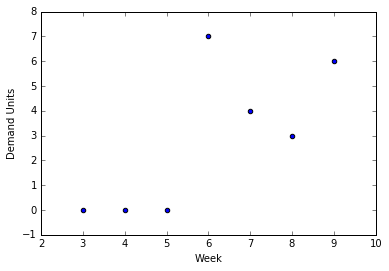

In [79]:
keys = predictor_list.keys()
k = keys[1121]
x = predictor_list[k][0]
y = predictor_list[k][1]

off = 3
xp = [3,4,5,6,7,8,9]
yp = [0,0,0,0,0,0,0]
for z in range(0,len(x)):
    yp[x[z]-off] = y[z]
    
print xp
print yp
plt.scatter(xp,yp)
plt.xlabel("Week")
plt.ylabel("Demand Units")

In [80]:
#we will use means of the form exp(mean(log(demand + 1))) - 1
import math
mean = 0.0

for y in yp:
    mean += math.log(y+1.0)
mean /= float(len(yp))
ans = math.exp(mean) - 1.0

ans


1.726481622128139